## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  53.768816  765.274893  0.917705   9.454081  1.438781
1  52.253365  423.566436  0.094172   7.255491  0.697916
2  69.909141  308.322959  0.161468   1.746776  0.528057
3  76.099571  160.138414  0.313067   8.847224  0.643949
4  43.247985  741.450163  0.024022  10.872184  0.316126


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.82014 | train_mse: 2.20782 | train_mae: 1.18853 |  0:00:00s
epoch 1  | loss: 0.65159 | train_mse: 1.62324 | train_mae: 1.0285  |  0:00:00s
epoch 2  | loss: 0.33212 | train_mse: 1.34166 | train_mae: 0.94865 |  0:00:00s


epoch 3  | loss: 0.31666 | train_mse: 1.23384 | train_mae: 0.85875 |  0:00:00s
epoch 4  | loss: 0.34178 | train_mse: 1.48329 | train_mae: 0.88956 |  0:00:00s
epoch 5  | loss: 0.38582 | train_mse: 1.11943 | train_mae: 0.80527 |  0:00:00s


epoch 6  | loss: 0.31111 | train_mse: 0.64118 | train_mae: 0.62879 |  0:00:00s
epoch 7  | loss: 0.26826 | train_mse: 0.70119 | train_mae: 0.64531 |  0:00:00s


epoch 8  | loss: 0.25371 | train_mse: 0.84286 | train_mae: 0.69626 |  0:00:00s


epoch 9  | loss: 0.21312 | train_mse: 0.63692 | train_mae: 0.58394 |  0:00:01s
epoch 10 | loss: 0.17269 | train_mse: 0.36519 | train_mae: 0.45644 |  0:00:01s
epoch 11 | loss: 0.24239 | train_mse: 0.26485 | train_mae: 0.39322 |  0:00:01s


epoch 12 | loss: 0.25531 | train_mse: 0.37388 | train_mae: 0.4515  |  0:00:01s
epoch 13 | loss: 0.20929 | train_mse: 0.42711 | train_mae: 0.48749 |  0:00:01s
epoch 14 | loss: 0.27163 | train_mse: 0.37074 | train_mae: 0.44933 |  0:00:01s
epoch 15 | loss: 0.23141 | train_mse: 0.37943 | train_mae: 0.44281 |  0:00:01s


epoch 16 | loss: 0.1887  | train_mse: 0.384   | train_mae: 0.47165 |  0:00:01s
epoch 17 | loss: 0.23821 | train_mse: 0.205   | train_mae: 0.36862 |  0:00:01s
epoch 18 | loss: 0.16046 | train_mse: 0.18571 | train_mae: 0.34755 |  0:00:01s
epoch 19 | loss: 0.28981 | train_mse: 0.20425 | train_mae: 0.35574 |  0:00:01s


epoch 20 | loss: 0.15859 | train_mse: 0.26696 | train_mae: 0.40241 |  0:00:02s
epoch 21 | loss: 0.1453  | train_mse: 0.37016 | train_mae: 0.44497 |  0:00:02s
epoch 22 | loss: 0.18319 | train_mse: 0.29062 | train_mae: 0.41678 |  0:00:02s


epoch 23 | loss: 0.29317 | train_mse: 0.18995 | train_mae: 0.33828 |  0:00:02s
epoch 24 | loss: 0.21628 | train_mse: 0.17291 | train_mae: 0.31531 |  0:00:02s
epoch 25 | loss: 0.25221 | train_mse: 0.16165 | train_mae: 0.31819 |  0:00:02s


epoch 26 | loss: 0.19523 | train_mse: 0.18507 | train_mae: 0.33421 |  0:00:02s
epoch 27 | loss: 0.14822 | train_mse: 0.16286 | train_mae: 0.31223 |  0:00:02s
epoch 28 | loss: 0.17096 | train_mse: 0.13734 | train_mae: 0.2856  |  0:00:02s
epoch 29 | loss: 0.19437 | train_mse: 0.1685  | train_mae: 0.31868 |  0:00:02s


epoch 30 | loss: 0.17335 | train_mse: 0.13413 | train_mae: 0.29095 |  0:00:02s
epoch 31 | loss: 0.275   | train_mse: 0.14834 | train_mae: 0.30466 |  0:00:02s
epoch 32 | loss: 0.14526 | train_mse: 0.23874 | train_mae: 0.3502  |  0:00:02s
epoch 33 | loss: 0.19478 | train_mse: 0.21287 | train_mae: 0.32889 |  0:00:02s


epoch 34 | loss: 0.17    | train_mse: 0.11983 | train_mae: 0.26786 |  0:00:02s
epoch 35 | loss: 0.23009 | train_mse: 0.11063 | train_mae: 0.25771 |  0:00:03s
epoch 36 | loss: 0.11424 | train_mse: 0.15412 | train_mae: 0.28303 |  0:00:03s


epoch 37 | loss: 0.18224 | train_mse: 0.15188 | train_mae: 0.2771  |  0:00:03s
epoch 38 | loss: 0.11698 | train_mse: 0.14458 | train_mae: 0.27194 |  0:00:03s
epoch 39 | loss: 0.14838 | train_mse: 0.12575 | train_mae: 0.25979 |  0:00:03s
epoch 40 | loss: 0.26192 | train_mse: 0.12208 | train_mae: 0.26995 |  0:00:03s


epoch 41 | loss: 0.11261 | train_mse: 0.12358 | train_mae: 0.2669  |  0:00:03s
epoch 42 | loss: 0.15095 | train_mse: 0.12498 | train_mae: 0.25743 |  0:00:03s
epoch 43 | loss: 0.16803 | train_mse: 0.11349 | train_mae: 0.24395 |  0:00:03s
epoch 44 | loss: 0.10321 | train_mse: 0.11937 | train_mae: 0.25703 |  0:00:03s


epoch 45 | loss: 0.20106 | train_mse: 0.10023 | train_mae: 0.24367 |  0:00:03s
epoch 46 | loss: 0.22422 | train_mse: 0.12823 | train_mae: 0.27783 |  0:00:03s
epoch 47 | loss: 0.14118 | train_mse: 0.14819 | train_mae: 0.29072 |  0:00:03s
epoch 48 | loss: 0.15908 | train_mse: 0.15264 | train_mae: 0.2798  |  0:00:03s


epoch 49 | loss: 0.12154 | train_mse: 0.14189 | train_mae: 0.273   |  0:00:03s
epoch 50 | loss: 0.16314 | train_mse: 0.11028 | train_mae: 0.24963 |  0:00:04s
epoch 51 | loss: 0.14955 | train_mse: 0.10397 | train_mae: 0.24608 |  0:00:04s
epoch 52 | loss: 0.13358 | train_mse: 0.13397 | train_mae: 0.27153 |  0:00:04s


epoch 53 | loss: 0.13554 | train_mse: 0.18724 | train_mae: 0.32758 |  0:00:04s
epoch 54 | loss: 0.20126 | train_mse: 0.1992  | train_mae: 0.34211 |  0:00:04s
epoch 55 | loss: 0.17497 | train_mse: 0.18419 | train_mae: 0.33158 |  0:00:04s
epoch 56 | loss: 0.15351 | train_mse: 0.14179 | train_mae: 0.28609 |  0:00:04s


epoch 57 | loss: 0.14799 | train_mse: 0.13627 | train_mae: 0.27559 |  0:00:04s
epoch 58 | loss: 0.11749 | train_mse: 0.16125 | train_mae: 0.30569 |  0:00:04s
epoch 59 | loss: 0.10798 | train_mse: 0.1462  | train_mae: 0.29146 |  0:00:04s
epoch 60 | loss: 0.14464 | train_mse: 0.13179 | train_mae: 0.28074 |  0:00:04s


epoch 61 | loss: 0.13441 | train_mse: 0.10688 | train_mae: 0.25709 |  0:00:04s
epoch 62 | loss: 0.16986 | train_mse: 0.08894 | train_mae: 0.23884 |  0:00:04s
epoch 63 | loss: 0.08637 | train_mse: 0.06944 | train_mae: 0.20441 |  0:00:04s


epoch 64 | loss: 0.09479 | train_mse: 0.06345 | train_mae: 0.19135 |  0:00:05s
epoch 65 | loss: 0.11283 | train_mse: 0.07042 | train_mae: 0.20156 |  0:00:05s
epoch 66 | loss: 0.1273  | train_mse: 0.07148 | train_mae: 0.20553 |  0:00:05s


epoch 67 | loss: 0.17576 | train_mse: 0.07469 | train_mae: 0.21261 |  0:00:05s
epoch 68 | loss: 0.08079 | train_mse: 0.07217 | train_mae: 0.21418 |  0:00:05s
epoch 69 | loss: 0.0742  | train_mse: 0.06418 | train_mae: 0.206   |  0:00:05s


epoch 70 | loss: 0.1644  | train_mse: 0.06095 | train_mae: 0.20696 |  0:00:05s
epoch 71 | loss: 0.1301  | train_mse: 0.07063 | train_mae: 0.21921 |  0:00:05s
epoch 72 | loss: 0.07878 | train_mse: 0.0756  | train_mae: 0.22973 |  0:00:05s


epoch 73 | loss: 0.15318 | train_mse: 0.07512 | train_mae: 0.22395 |  0:00:05s
epoch 74 | loss: 0.09228 | train_mse: 0.06436 | train_mae: 0.20111 |  0:00:05s
epoch 75 | loss: 0.10125 | train_mse: 0.05613 | train_mae: 0.18798 |  0:00:05s


epoch 76 | loss: 0.09879 | train_mse: 0.06926 | train_mae: 0.20884 |  0:00:06s
epoch 77 | loss: 0.11208 | train_mse: 0.07902 | train_mae: 0.21635 |  0:00:06s


epoch 78 | loss: 0.1209  | train_mse: 0.0542  | train_mae: 0.17824 |  0:00:06s
epoch 79 | loss: 0.13811 | train_mse: 0.05747 | train_mae: 0.18931 |  0:00:06s


epoch 80 | loss: 0.13064 | train_mse: 0.06138 | train_mae: 0.20064 |  0:00:06s
epoch 81 | loss: 0.07633 | train_mse: 0.05922 | train_mae: 0.19787 |  0:00:06s
epoch 82 | loss: 0.12223 | train_mse: 0.0681  | train_mae: 0.19787 |  0:00:07s


epoch 83 | loss: 0.12118 | train_mse: 0.06262 | train_mae: 0.18303 |  0:00:07s
epoch 84 | loss: 0.08532 | train_mse: 0.06568 | train_mae: 0.19272 |  0:00:07s
epoch 85 | loss: 0.26478 | train_mse: 0.0729  | train_mae: 0.19489 |  0:00:07s
epoch 86 | loss: 0.14285 | train_mse: 0.06363 | train_mae: 0.18586 |  0:00:07s


epoch 87 | loss: 0.10354 | train_mse: 0.05652 | train_mae: 0.19386 |  0:00:07s
epoch 88 | loss: 0.14968 | train_mse: 0.04918 | train_mae: 0.17004 |  0:00:07s
epoch 89 | loss: 0.12017 | train_mse: 0.04694 | train_mae: 0.17271 |  0:00:07s
epoch 90 | loss: 0.08278 | train_mse: 0.05191 | train_mae: 0.18066 |  0:00:07s


epoch 91 | loss: 0.09264 | train_mse: 0.05379 | train_mae: 0.18504 |  0:00:07s
epoch 92 | loss: 0.11449 | train_mse: 0.04997 | train_mae: 0.18431 |  0:00:07s
epoch 93 | loss: 0.08044 | train_mse: 0.06095 | train_mae: 0.19854 |  0:00:07s
epoch 94 | loss: 0.11397 | train_mse: 0.06173 | train_mae: 0.19158 |  0:00:07s


epoch 95 | loss: 0.07812 | train_mse: 0.05471 | train_mae: 0.18586 |  0:00:07s
epoch 96 | loss: 0.15778 | train_mse: 0.05054 | train_mae: 0.17911 |  0:00:07s
epoch 97 | loss: 0.07214 | train_mse: 0.06071 | train_mae: 0.18835 |  0:00:08s
epoch 98 | loss: 0.16599 | train_mse: 0.08507 | train_mae: 0.20056 |  0:00:08s


epoch 99 | loss: 0.14991 | train_mse: 0.09515 | train_mae: 0.20373 |  0:00:08s
epoch 100| loss: 0.11871 | train_mse: 0.08501 | train_mae: 0.2128  |  0:00:08s
epoch 101| loss: 0.12413 | train_mse: 0.05773 | train_mae: 0.18873 |  0:00:08s
epoch 102| loss: 0.10596 | train_mse: 0.05938 | train_mae: 0.18937 |  0:00:08s


epoch 103| loss: 0.11291 | train_mse: 0.06023 | train_mae: 0.19074 |  0:00:08s
epoch 104| loss: 0.11343 | train_mse: 0.06318 | train_mae: 0.20448 |  0:00:08s
epoch 105| loss: 0.07909 | train_mse: 0.08695 | train_mae: 0.23961 |  0:00:08s
epoch 106| loss: 0.11767 | train_mse: 0.09359 | train_mae: 0.24428 |  0:00:08s


epoch 107| loss: 0.1649  | train_mse: 0.07538 | train_mae: 0.22602 |  0:00:08s
epoch 108| loss: 0.10967 | train_mse: 0.05086 | train_mae: 0.18385 |  0:00:08s
epoch 109| loss: 0.12076 | train_mse: 0.05436 | train_mae: 0.18897 |  0:00:08s
epoch 110| loss: 0.09231 | train_mse: 0.06212 | train_mae: 0.20131 |  0:00:08s


epoch 111| loss: 0.09991 | train_mse: 0.07787 | train_mae: 0.22139 |  0:00:08s
epoch 112| loss: 0.11759 | train_mse: 0.08797 | train_mae: 0.22674 |  0:00:09s
epoch 113| loss: 0.17757 | train_mse: 0.11859 | train_mae: 0.2371  |  0:00:09s


epoch 114| loss: 0.18338 | train_mse: 0.08171 | train_mae: 0.21533 |  0:00:09s
epoch 115| loss: 0.11923 | train_mse: 0.06534 | train_mae: 0.1977  |  0:00:09s
epoch 116| loss: 0.09129 | train_mse: 0.09397 | train_mae: 0.2332  |  0:00:09s
epoch 117| loss: 0.14729 | train_mse: 0.10422 | train_mae: 0.23555 |  0:00:09s


epoch 118| loss: 0.10061 | train_mse: 0.07906 | train_mae: 0.21667 |  0:00:09s
epoch 119| loss: 0.10103 | train_mse: 0.07445 | train_mae: 0.21339 |  0:00:09s
epoch 120| loss: 0.05831 | train_mse: 0.06549 | train_mae: 0.20573 |  0:00:09s
epoch 121| loss: 0.16535 | train_mse: 0.05453 | train_mae: 0.19038 |  0:00:09s


epoch 122| loss: 0.17851 | train_mse: 0.05494 | train_mae: 0.18544 |  0:00:09s
epoch 123| loss: 0.09949 | train_mse: 0.07384 | train_mae: 0.20037 |  0:00:09s
epoch 124| loss: 0.09141 | train_mse: 0.07024 | train_mae: 0.20113 |  0:00:09s
epoch 125| loss: 0.08323 | train_mse: 0.05375 | train_mae: 0.1859  |  0:00:09s


epoch 126| loss: 0.10708 | train_mse: 0.05483 | train_mae: 0.18636 |  0:00:09s
epoch 127| loss: 0.07183 | train_mse: 0.06005 | train_mae: 0.1933  |  0:00:10s
epoch 128| loss: 0.09591 | train_mse: 0.06436 | train_mae: 0.19899 |  0:00:10s


epoch 129| loss: 0.17455 | train_mse: 0.06707 | train_mae: 0.1945  |  0:00:10s
epoch 130| loss: 0.09672 | train_mse: 0.0649  | train_mae: 0.18594 |  0:00:10s
epoch 131| loss: 0.0762  | train_mse: 0.05325 | train_mae: 0.1761  |  0:00:10s
epoch 132| loss: 0.08715 | train_mse: 0.05134 | train_mae: 0.17892 |  0:00:10s


epoch 133| loss: 0.09246 | train_mse: 0.05057 | train_mae: 0.17475 |  0:00:10s
epoch 134| loss: 0.1745  | train_mse: 0.04961 | train_mae: 0.17838 |  0:00:10s
epoch 135| loss: 0.08968 | train_mse: 0.05048 | train_mae: 0.18243 |  0:00:10s
epoch 136| loss: 0.14443 | train_mse: 0.06059 | train_mae: 0.197   |  0:00:10s


epoch 137| loss: 0.11235 | train_mse: 0.05285 | train_mae: 0.17606 |  0:00:10s
epoch 138| loss: 0.08874 | train_mse: 0.05033 | train_mae: 0.17213 |  0:00:10s

Early stopping occurred at epoch 138 with best_epoch = 88 and best_train_mae = 0.17004
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

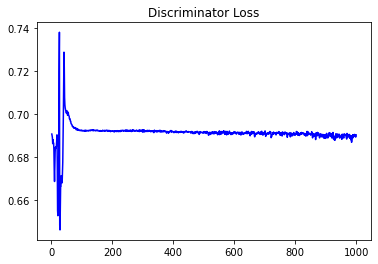

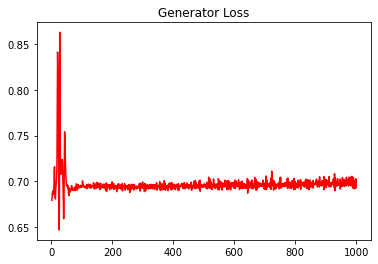

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3240770946223665


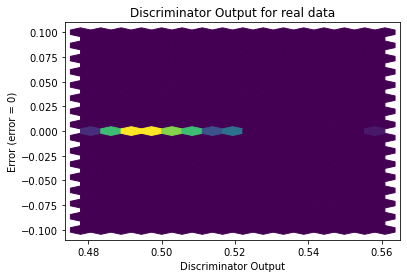

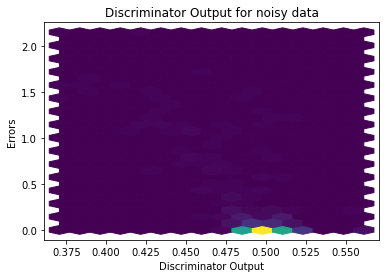

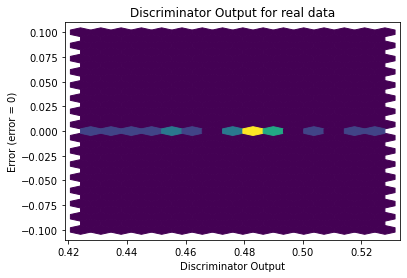

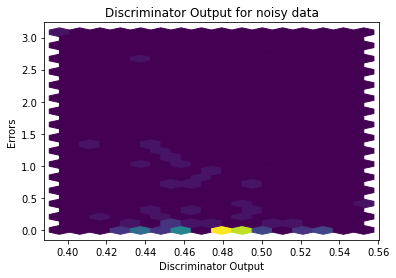

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


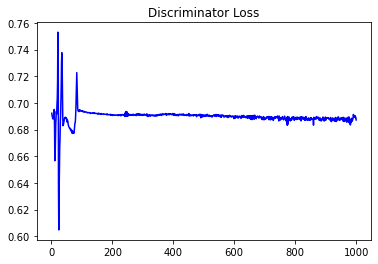

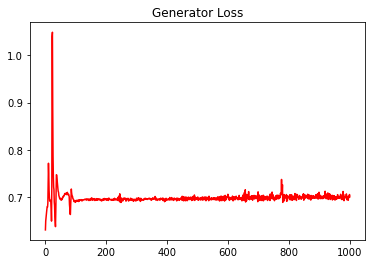

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.32687721897157973


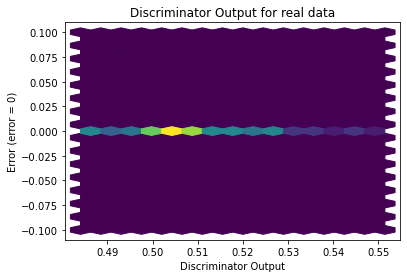

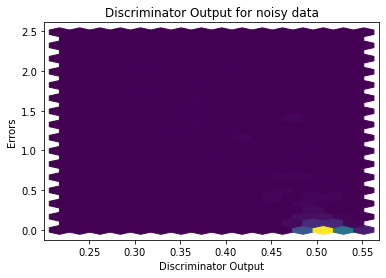

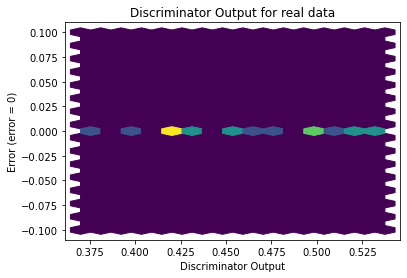

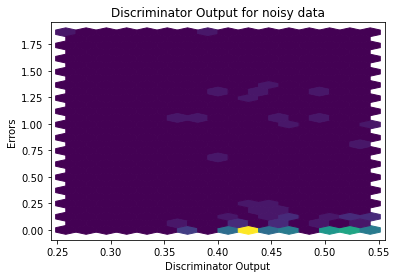

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6703]], requires_grad=True)
